In [2]:
import pandas as pd
import numpy as np


In [3]:
melbourne=pd.read_csv('Melbourne_housing_FULL.csv')
melbourne_suburb=melbourne.groupby('Suburb')
melbourne.describe()


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [4]:
melbourne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [5]:
suburb=melbourne_suburb.groups.keys()
melbourne.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [6]:
suburb=melbourne_suburb.groups.keys()
pilihan_per_sub=pd.DataFrame()
n=[]
# for i in suburb:
#     if " " in i:
#         a=i
#         i=i.replace(" ",'_')
#         # print(i)
#         vars()[i]=melbourne_suburb.get_group(a)
#         n.append(i)
#     else:
#         n.append(i)
#         vars()[i]=melbourne_suburb.get_group(i)
    
# hasil.rename(columns={0:'Pilihan',1:'rata-rata harga',2:'rata-rata ruangan',3:'rata-rata ruang parkir'},inplace=True)

In [7]:
melbourne_region = melbourne.groupby('Regionname')
hier=pd.DataFrame()
nama_suburb={}
for i in melbourne_region.groups.keys():
    nama_suburb.update({i: melbourne_region.get_group(i)['Suburb'].unique()})
    # hier[i]= [len(nama_suburb[i])]
    jumlah=0
    type={'h':0,'br':0, 'u':0,'t':0,'dev site':0, 'o res':0}
    seller=dict()
    for x in range(len(nama_suburb[i])):
        jumlah+=len(melbourne_suburb.get_group(nama_suburb[i][x]))
        key=dict(melbourne_suburb.get_group(nama_suburb[i][x])['Type'].value_counts())
        range_harga=pd.cut(melbourne_region.get_group(i)['Price'],2,labels='Cheep Expensive'.split())
        key_sel=dict(melbourne_suburb.get_group(nama_suburb[i][x])['SellerG'].value_counts())
        for y in key:
            type[y]+=key[y]
        for a in key_sel:
            if a in seller.keys():
                seller[a]+=key_sel[a]
            else:
                seller[a]=key_sel[a]
        hier[i]=[len(nama_suburb[i]),jumlah, range_harga.value_counts(),\
            type['h'], type['u'], type['t'], type['dev site'],type['o res'],type['br'], seller]
    # jumlah=0
    # type={'h':0,'br':0, 'u':0,'t':0,'dev site':0, 'o res':0}
hier[""]=['Suburb','Properti','range harga','house','unit','townhouse','development site','other residental','bedroom','seller']
hier.set_index('',inplace=True)
hier

,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
,,,,,,,,
Suburb,58,27,61,16,46,61,74,7
Properti,4377,228,9557,203,1739,11837,6800,115
range harga,Cheep 3238 Expensive 34 Name: Pric...,"Cheep 164 Expensive 2 Name: Price,...",Cheep 7845 Expensive 19 Name: Pric...,"Cheep 143 Expensive 23 Name: Price,...",Cheep 1340 Expensive 1 Name: Pric...,Cheep 8501 Expensive 23 Name: Pric...,Cheep 5744 Expensive 71 Name: Pric...,"Cheep 93 Expensive 3 Name: Price, d..."
house,3438,216,6489,199,1356,6969,5199,113
unit,548,7,2033,3,221,3536,947,2
townhouse,391,5,1035,1,162,1332,654,0
development site,0,0,0,0,0,0,0,0
other residental,0,0,0,0,0,0,0,0
bedroom,0,0,0,0,0,0,0,0


In [8]:
# melbourne_suburb[nama_suburb["Western Metropolitan"][0]]
key=dict(melbourne_suburb.get_group(nama_suburb['Eastern Metropolitan'][1])['SellerG'].value_counts())
# for i in melbourne_suburb.get_group(nama_suburb['Eastern Metropolitan'][1])['Type'].value_counts():
#      print(i)
#      hasil={key:val}
# range_harga.value_counts()[1]
key['Darus']=1
'Darus' in key.keys()
# melbourne_region.get_group('Eastern Metropolitan')['Price'].min()
sales_team=pd.DataFrame(hier['Eastern Metropolitan'].loc['seller'],index=[0])
sales_team=sales_team.T
sales_bean=pd.cut(sales_team[0],bins=3,labels='s m t'.split())
sales_team['Kategori']=sales_bean
sales_kecil={'sales':len(sales_team[sales_team['Kategori']=='s']),'jumlah pemasaran':sales_team[sales_team['Kategori']=='s'][0].sum()}
sales_sedang={'sales':len(sales_team[sales_team['Kategori']=='m']),'jumlah pemasaran':sales_team[sales_team['Kategori']=='m'][0].sum()}
sales_tinggi={'sales':len(sales_team[sales_team['Kategori']=='t']),'jumlah pemasaran':sales_team[sales_team['Kategori']=='t'][0].sum()}
summary=pd.DataFrame([sales_kecil,sales_sedang,sales_tinggi])
summary['']='kecil sedang besar'.split()
summary.set_index('',inplace=True)
print('Data sales di Eastern Metropolitan')
summary

Data sales di Eastern Metropolitan


,sales,jumlah pemasaran
,,
kecil,115,1918
sedang,4,1679
besar,1,780


In [9]:
region='Eastern Victoria'
sales_team=pd.DataFrame(hier[region].loc['seller'],index=[0])
sales_team=sales_team.T
sales_bean=pd.cut(sales_team[0],bins=3,labels='s m t'.split())
sales_team['Kategori']=sales_bean
sales_kecil={'sales':len(sales_team[sales_team['Kategori']=='s']),'jumlah pemasaran':sales_team[sales_team['Kategori']=='s'][0].sum()}
sales_sedang={'sales':len(sales_team[sales_team['Kategori']=='m']),'jumlah pemasaran':sales_team[sales_team['Kategori']=='m'][0].sum()}
sales_tinggi={'sales':len(sales_team[sales_team['Kategori']=='t']),'jumlah pemasaran':sales_team[sales_team['Kategori']=='t'][0].sum()}
summary=pd.DataFrame([sales_kecil,sales_sedang,sales_tinggi])
summary['']='kecil sedang besar'.split()
summary.set_index('',inplace=True)
print(f'Data sales di {region}')
summary

Data sales di Eastern Victoria


,sales,jumlah pemasaran
,,
kecil,32,88
sedang,2,29
besar,4,111


In [10]:
region='Northern Metropolitan'
sales_team=pd.DataFrame(hier[region].loc['seller'],index=[0])
sales_team=sales_team.T
sales_bean=pd.cut(sales_team[0],bins=3,labels='s m t'.split())
sales_team['Kategori']=sales_bean
sales_kecil={'sales':len(sales_team[sales_team['Kategori']=='s']),'jumlah pemasaran':sales_team[sales_team['Kategori']=='s'][0].sum()}
sales_sedang={'sales':len(sales_team[sales_team['Kategori']=='m']),'jumlah pemasaran':sales_team[sales_team['Kategori']=='m'][0].sum()}
sales_tinggi={'sales':len(sales_team[sales_team['Kategori']=='t']),'jumlah pemasaran':sales_team[sales_team['Kategori']=='t'][0].sum()}
summary=pd.DataFrame([sales_kecil,sales_sedang,sales_tinggi])
summary['']='kecil sedang besar'.split()
summary.set_index('',inplace=True)
print(f'Data sales di {region}')
summary

Data sales di Northern Metropolitan


,sales,jumlah pemasaran
,,
kecil,152,4741
sedang,3,2860
besar,1,1956


In [11]:
region='Northern Victoria'
sales_team=pd.DataFrame(hier[region].loc['seller'],index=[0])
sales_team=sales_team.T
sales_bean=pd.cut(sales_team[0],bins=3,labels='s m t'.split())
sales_team['Kategori']=sales_bean
sales_kecil={'sales':len(sales_team[sales_team['Kategori']=='s']),'jumlah pemasaran':sales_team[sales_team['Kategori']=='s'][0].sum()}
sales_sedang={'sales':len(sales_team[sales_team['Kategori']=='m']),'jumlah pemasaran':sales_team[sales_team['Kategori']=='m'][0].sum()}
sales_tinggi={'sales':len(sales_team[sales_team['Kategori']=='t']),'jumlah pemasaran':sales_team[sales_team['Kategori']=='t'][0].sum()}
summary=pd.DataFrame([sales_kecil,sales_sedang,sales_tinggi])
summary['']='kecil sedang besar'.split()
summary.set_index('',inplace=True)
print(f'Data sales di {region}')
summary

Data sales di Northern Victoria


,sales,jumlah pemasaran
,,
kecil,35,111
sedang,1,16
besar,2,76


In [12]:
hasil=pd.DataFrame(columns='sales,jumlah pemasaran'.split(','))

for i in melbourne_region.groups.keys():
    region=i
    sales_team=pd.DataFrame(hier[region].loc['seller'],index=[0])
    sales_team=sales_team.T
    sales_bean=pd.cut(sales_team[0],bins=3,labels='s m t'.split())
    sales_team['Kategori']=sales_bean
    sales_kecil={'sales':len(sales_team[sales_team['Kategori']=='s']),'jumlah pemasaran':sales_team[sales_team['Kategori']=='s'][0].sum(),'region': i}
    sales_sedang={'sales':len(sales_team[sales_team['Kategori']=='m']),'jumlah pemasaran':sales_team[sales_team['Kategori']=='m'][0].sum(),'region':i}
    sales_tinggi={'sales':len(sales_team[sales_team['Kategori']=='t']),'jumlah pemasaran':sales_team[sales_team['Kategori']=='t'][0].sum(),'region':i}
    summary=pd.DataFrame([sales_kecil,sales_sedang,sales_tinggi])
    hasil = pd.merge(hasil,summary,how='outer')
hasil['']=('kecil sedang besar'.split())*(round(len(hasil)/3))
hasil.set_index('',inplace=True)
hasil

,sales,jumlah pemasaran,region
,,,
kecil,115,1918,Eastern Metropolitan
sedang,4,1679,Eastern Metropolitan
besar,1,780,Eastern Metropolitan
kecil,32,88,Eastern Victoria
sedang,2,29,Eastern Victoria
besar,4,111,Eastern Victoria
kecil,152,4741,Northern Metropolitan
sedang,3,2860,Northern Metropolitan
besar,1,1956,Northern Metropolitan


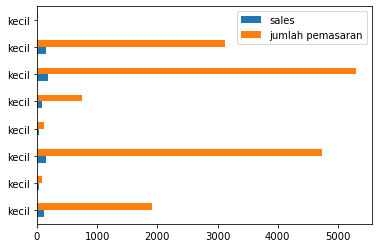

In [13]:
hasil.loc['kecil'].plot(kind='barh')

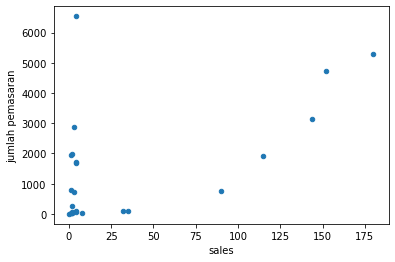

In [16]:
hasil.plot(x='sales',y='jumlah pemasaran',kind='scatter')